In [1]:
from som import *

# Example: iris

In [83]:
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [84]:
iris = datasets.load_iris()

In [85]:
X = iris.data
Y = iris.target

In [86]:
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, X)

In [111]:
# Initialization and training
som = SOM(7, 7, 4, learning_rate=0.3, sigma=2.3, f_neighborhood='gaussian')

In [112]:
som.execute_train(data, 50, init_method='pca')

 [ 7500 / 7500 ] 100% - 0.00184 it/s

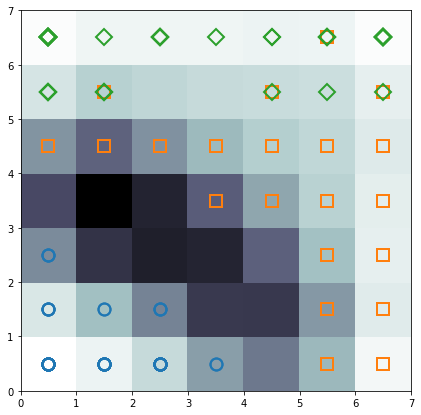

In [113]:
plt.figure(figsize=(7, 7))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()


# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[Y[cnt]], markerfacecolor='None',
             markeredgecolor=colors[Y[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 7, 0, 7])
plt.show()

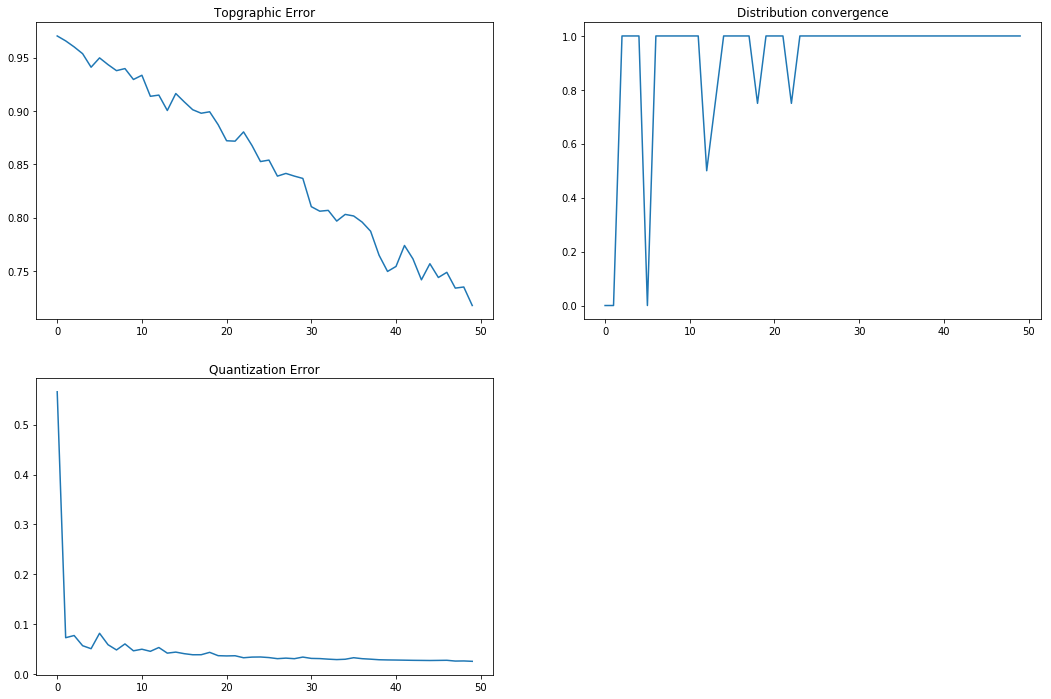

In [114]:
plt.figure(figsize=(18, 6*2));

plt.subplot(2, 2, 1)
plt.plot(som.list_topgraphic_error)
plt.title('Topgraphic Error');

plt.subplot(2, 2, 2)
plt.plot(som.list_dist_convg)
plt.title('Distribution convergence');

plt.subplot(2, 2, 3)
plt.plot(som.list_quantization_error)
plt.title('Quantization Error');

# Example: Hand Write

In [10]:
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]


In [11]:
som = SOM(30, 30, 64, learning_rate=0.5, sigma=4, f_neighborhood='triangle')
som.execute_train(data, 10, init_method='pca')

 [ 17970 / 17970 ] 100% - 0.01420 it/ss

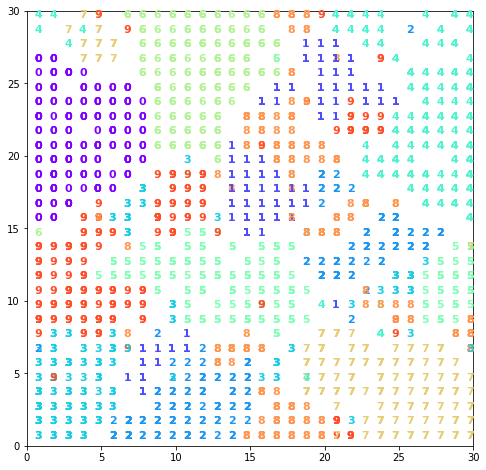

In [12]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som._weights.shape[0], 0,  som._weights.shape[1]]);

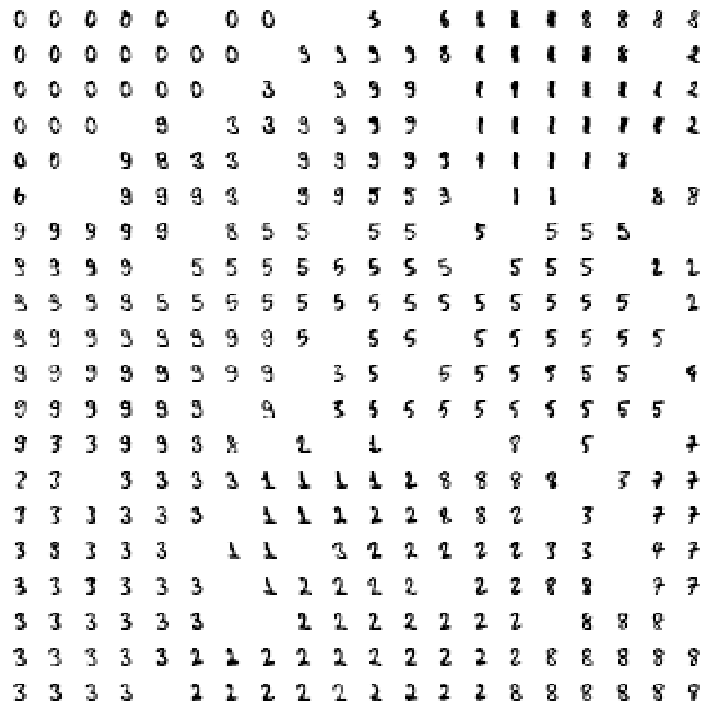

In [13]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()


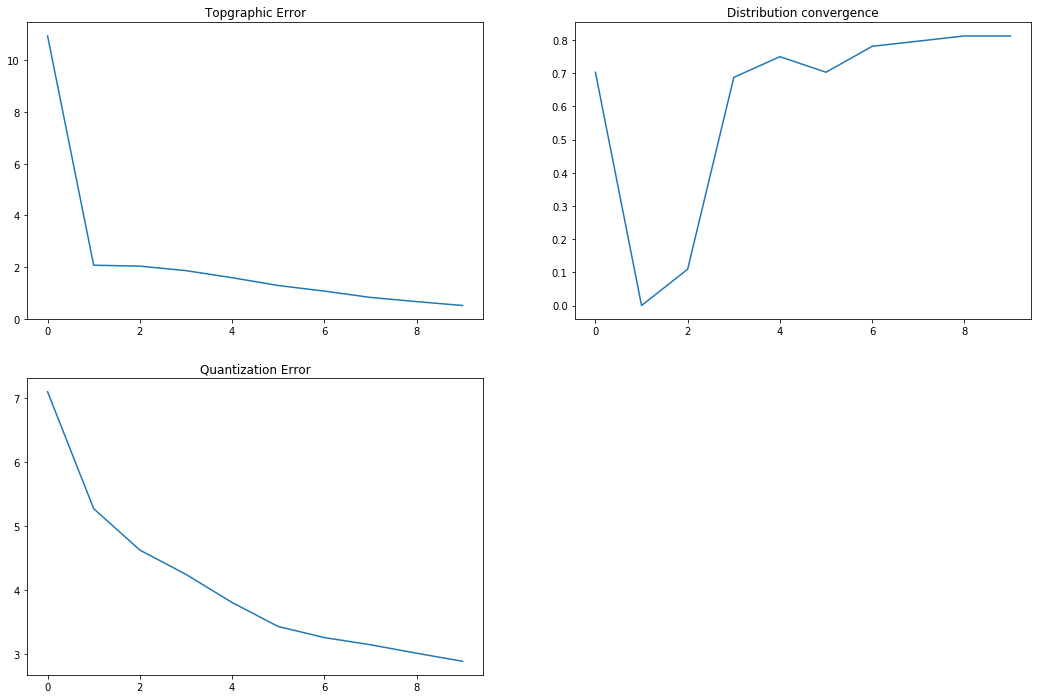

In [14]:
plt.figure(figsize=(18, 6*2));

plt.subplot(2, 2, 1)
plt.plot(som.list_topgraphic_error)
plt.title('Topgraphic Error');

plt.subplot(2, 2, 2)
plt.plot(som.list_dist_convg)
plt.title('Distribution convergence');

plt.subplot(2, 2, 3)
plt.plot(som.list_quantization_error)
plt.title('Quantization Error');